#  4대궁 및 종묘에 새로운 한복대여점을 오픈한다면, 경쟁력이 있을까?

## 정의
* 경쟁력이 있다란, 전년도 대비 한복착용 입장객 수/4대궁 및 종묘 방문객 수가 증가하고 있을 때 '경쟁력'이 있다고 하겠다.

## 설계
* 4대궁 및 종묘의 방문객 수와 한복착용 입장객현황의 증가율을 비교하겠다.


## 데이터 분석 및 이미지 출력을 위한 설정

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np

from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 4대궁 및 종묘의 방문객 수의 추이

## 데이터 불러오기 & 확인하기

In [2]:
data = pd.read_csv('data/서울시 주요관광지점 입장객 (4대궁 및 종묘) 통계.txt', sep='\t').drop(0).drop('구분', axis=1)
data.columns = ['기간', '경복궁 일평균', '경복궁 소계', '경복궁 내국인', '경복궁 외국인', 
                '창덕궁 일평균', '창덕궁 소계', '창덕궁 내국인', '창덕궁 외국인',
                '창경궁 일평균', '창경궁 소계', '창경궁 내국인', '창경궁 외국인',
                '덕수궁 일평균', '덕수궁 소계', '덕수궁 내국인', '덕수궁 외국인', 
                '종묘 일평균', '종묘 소계', '종묘 내국인', '종묘 외국인']
sel_data=data[['기간','경복궁 소계', '창덕궁 소계', '창경궁 소계', '덕수궁 소계', '종묘 소계']]
sel_data.columns=['기간','경복궁','창덕궁','창경궁','덕수궁','종묘']

## 전처리

In [3]:
sel_data = sel_data.apply(lambda x: x.str.replace(',', ''))
sel_data['기간'] = pd.to_datetime(sel_data['기간'])
sel_data['경복궁'] = pd.to_numeric(sel_data['경복궁'])
sel_data['창덕궁'] = pd.to_numeric(sel_data['창덕궁'])
sel_data['창경궁'] = pd.to_numeric(sel_data['창경궁'])
sel_data['덕수궁'] = pd.to_numeric(sel_data['덕수궁'])
sel_data['종묘'] = pd.to_numeric(sel_data['종묘'])
sel_data['총합'] = sel_data.sum(axis=1)

## 필요한 데이터만 추출

In [4]:
data_total=sel_data[['기간','총합']].copy()
data_total = data_total.reset_index()
data_total

,index,기간,총합
0,1,2017-01-01,544656
1,2,2017-02-01,500005
2,3,2017-03-01,537643
3,4,2017-04-01,1007710
4,5,2017-05-01,965034
5,6,2017-06-01,588971
6,7,2017-07-01,504440
7,8,2017-08-01,557105
8,9,2017-09-01,742265
9,10,2017-10-01,2245281


## 시각화를 통한 데이터 확인-방문객 수

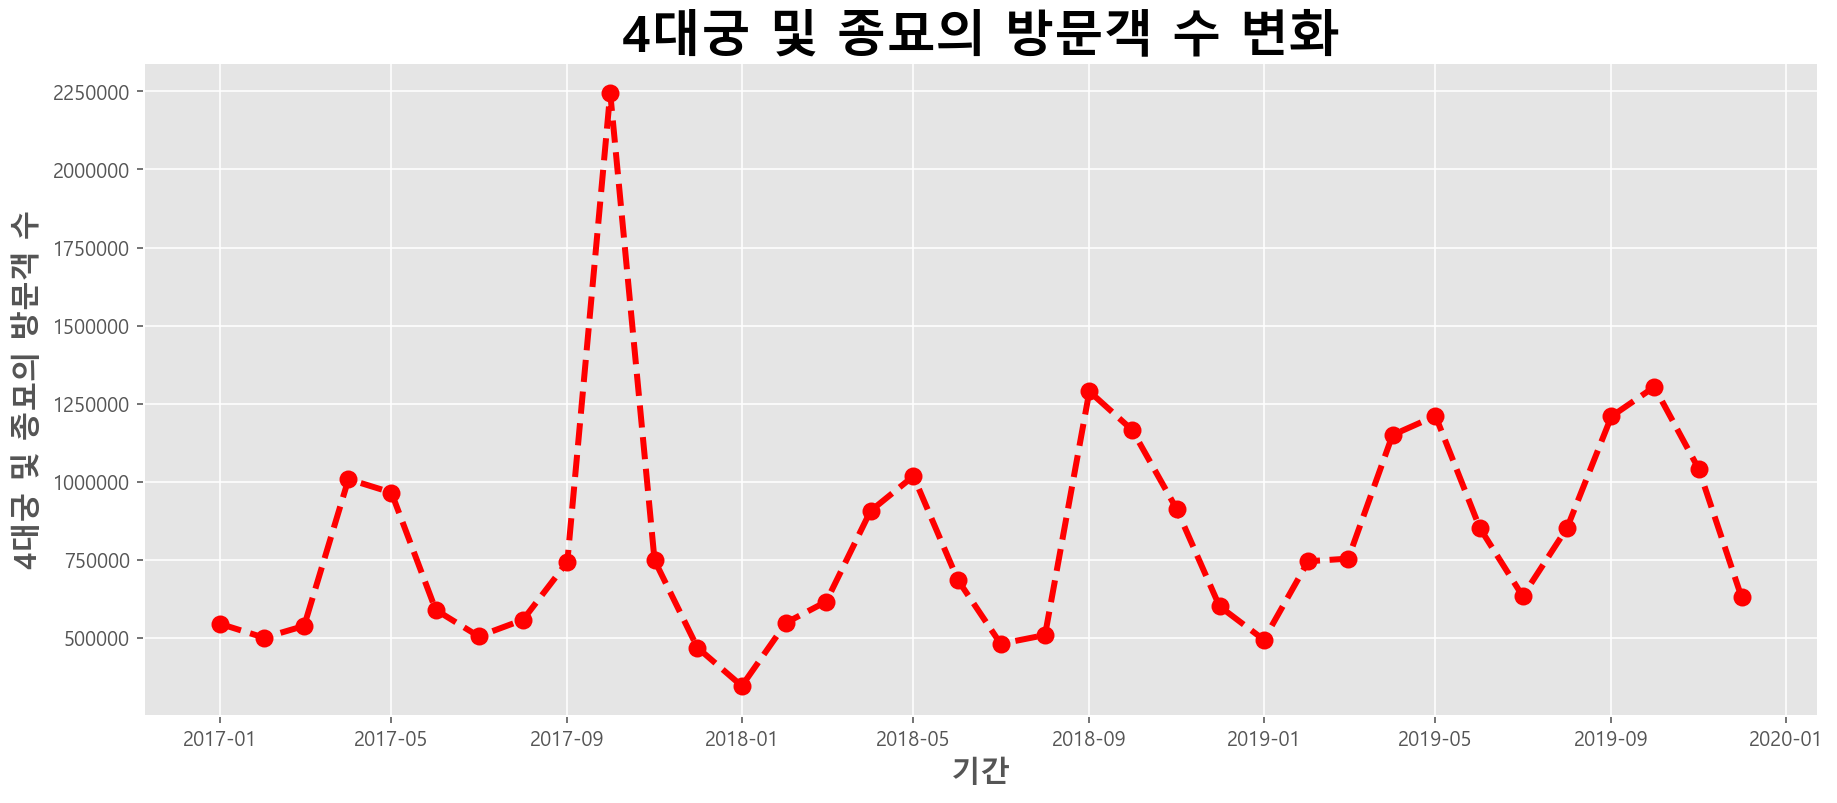

In [5]:
indexed_visit=data_total.set_index('기간')
tv=indexed_visit['총합']
plt.figure(figsize=(15,6))
plt.plot(tv,'ro--',linewidth=3,markersize=8)

plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('4대궁 및 종묘의 방문객 수',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 방문객 수 변화',fontdict= { 'weight': 'bold','size':'25'})

plt.show()

# 4대궁 및 종묘의 한복착용 입장객 추이

## 데이터 불러오기 & 확인하기

In [6]:
kc_visit=pd.read_excel(f'data/문화재청_4대궁및종묘 한복착용 입장객현황.xlsx')
kc_visit.shape
kc_visit.head(2)
kc_visit.tail(2)
kc_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      36 non-null     object
 1   경복궁     36 non-null     int64 
 2   창덕궁     36 non-null     int64 
 3   덕수궁     36 non-null     int64 
 4   창경궁     36 non-null     int64 
 5   종묘      36 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


## 전처리

In [7]:
kc_visit['총합']=kc_visit['경복궁']+kc_visit['창덕궁']+kc_visit['창경궁']+kc_visit['덕수궁']+kc_visit['종묘']
for i in range(len(kc_visit['기간'].index)):
    kc_visit['기간'][i]=kc_visit['기간'][i].replace('년','').replace(' ','-').replace('월','')
    
kc_visit['기간']=pd.to_datetime(kc_visit['기간'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 필요한 데이터만 추출

In [8]:
sel_kc_visit=kc_visit[['기간','총합']].copy()
sel_kc_visit

,기간,총합
0,2017-01-01,23021
1,2017-02-01,31361
2,2017-03-01,39482
3,2017-04-01,76459
4,2017-05-01,76816
5,2017-06-01,41011
6,2017-07-01,36868
7,2017-08-01,39918
8,2017-09-01,62831
9,2017-10-01,113791


## 시각화를 통한 데이터 확인-한복착용 입장객 수

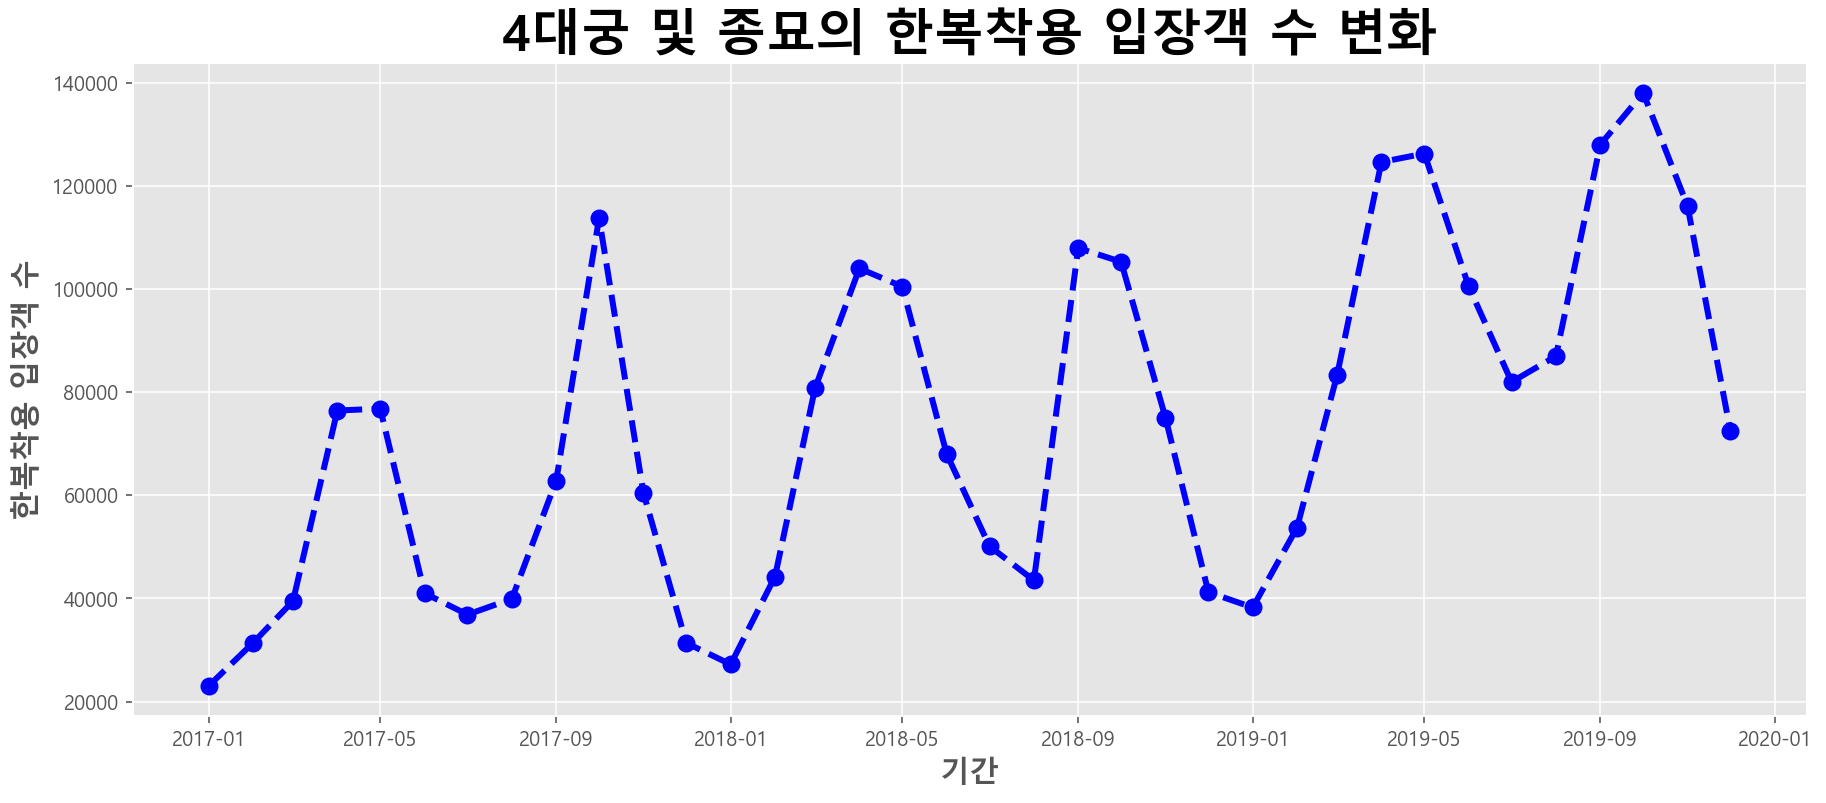

In [9]:
indexed_kc_visit=sel_kc_visit.set_index('기간')
kctv=indexed_kc_visit['총합']
plt.figure(figsize=(15,6))
plt.plot(kctv,'bo--',linewidth=3,markersize=8)

plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객 수',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 한복착용 입장객 수 변화',fontdict= { 'weight': 'bold','size':'25'})

plt.show()

## 한복착용 입장객 비율 확인을 위한 데이터 구성

In [10]:
kc_per_visit=pd.DataFrame()
kc_per_visit['기간']=sel_kc_visit['기간']
kc_per_visit['비율']=sel_kc_visit['총합']/data_total['총합']*100
kc_per_visit=kc_per_visit.copy()
kc_per_visit

,기간,비율
0,2017-01-01,4.226705
1,2017-02-01,6.272137
2,2017-03-01,7.343535
3,2017-04-01,7.587401
4,2017-05-01,7.959927
5,2017-06-01,6.963161
6,2017-07-01,7.308699
7,2017-08-01,7.165256
8,2017-09-01,8.464767
9,2017-10-01,5.068007


## 시각화를 통한 데이터 확인-한복착용 입장객/총 방문객

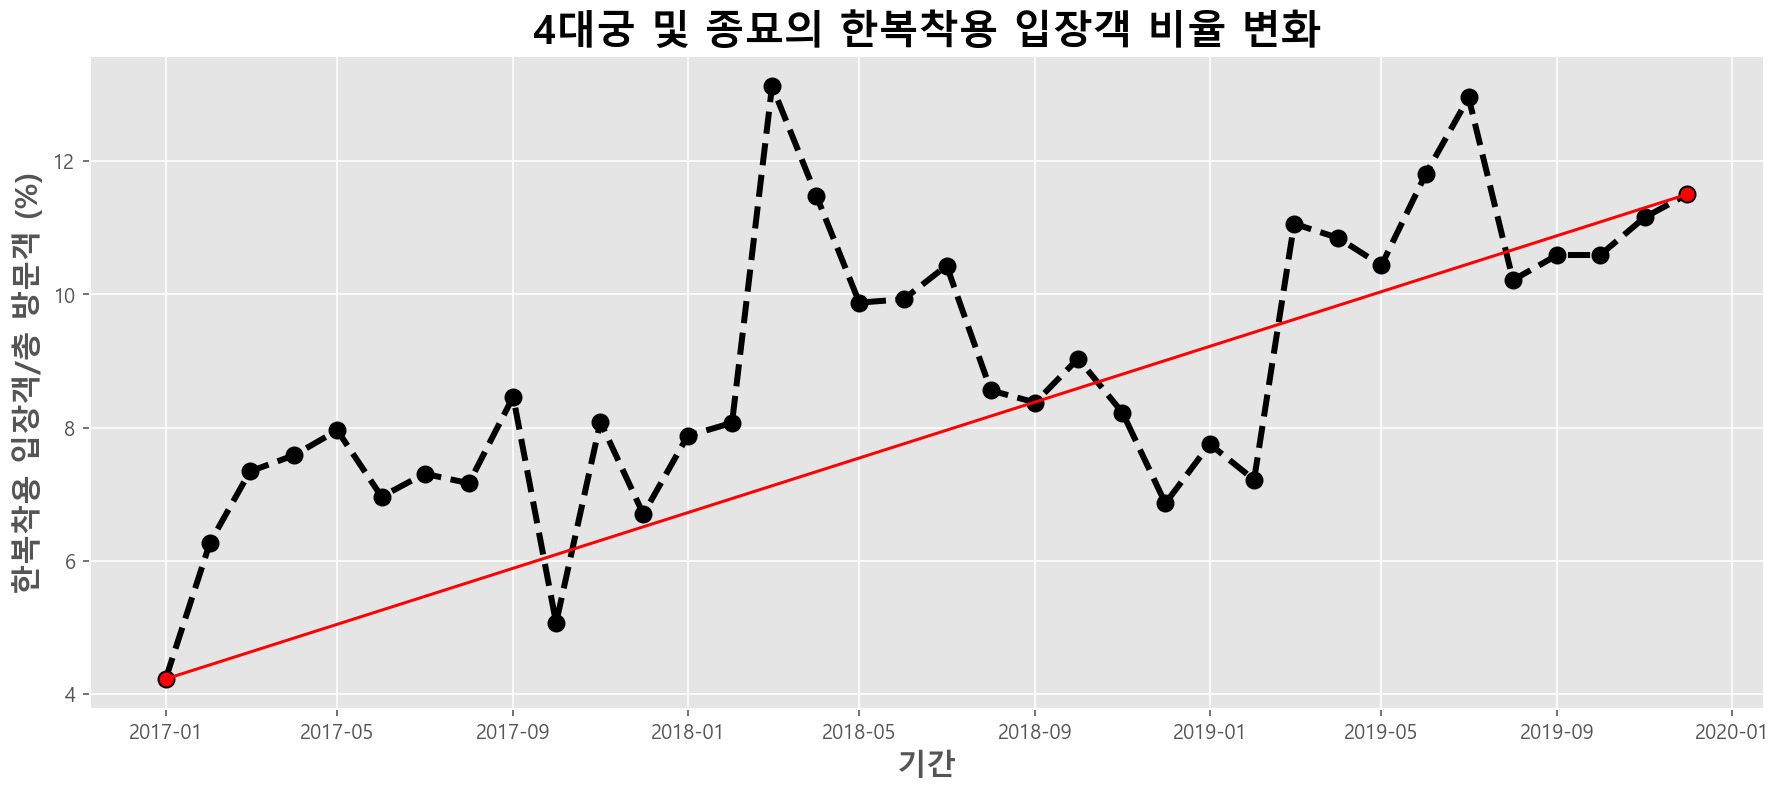

In [11]:
indexed_kc_per_visit=kc_per_visit.set_index('기간')
ratio=indexed_kc_per_visit['비율']
plt.figure(figsize=(15,6))
plt.plot(ratio,'ko--',linewidth=3,markersize=8)
plt.plot([indexed_kc_per_visit.index[0],indexed_kc_per_visit.index[35]],[ratio[0],ratio[35]],'ro-')

plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 한복착용 입장객 비율 변화', fontdict= { 'weight': 'bold','size':'20'} )

plt.show()

# 데이터 분석을 통한 결론
   * 2017년부터 2020년까지 4대 궁 및 종묘의 방문객 수 중 한복 착용 입장객의 비율이 꾸준히 높아지고 있으므로 경쟁력이 있다고 판단
   * 사업 런칭 시 타겟층으로 어디를 겨냥할 지 추가 분석 필요

# 지도에 출력

In [12]:
m=folium.Map(location=[37.575,126.98],zoom_start=14)
tooltip = 'Click Castle!'
com_tooltip=' Competitors! '

folium.Marker([37.57962, 126.977028], popup='<b>Gyeongbokgung Palace</b>', tooltip=tooltip).add_to(m)
folium.Marker([37.582029, 126.991373], popup='<b>Changdeokgung Palace</b>', tooltip=tooltip).add_to(m)
folium.Marker([37.579485, 126.994784], popup='<b>Changgyeonggung Palace</b>', tooltip=tooltip).add_to(m)
folium.Marker([37.5658859, 126.9754788], popup='<b>Deoksugung Palace</b>', tooltip=tooltip).add_to(m)
folium.Marker([37.574444, 126.994167], popup='<b>Jongmyo Shrine</b>', tooltip=tooltip).add_to(m)

folium.CircleMarker([37.575375, 126.978762], radius=8, fill=True, color='red', popup='<b>Cham Hanbok</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.577777, 126.972382], radius=8, fill=True, color='red', popup='<b>Seochonnadri</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.576787, 126.973451], radius=8, fill=True, color='red', popup='<b>Hanboknam</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.578643, 126.972226], radius=8, fill=True, color='red', popup='<b>Haewadal hanbok</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.576769, 126.973415], radius=8, fill=True, color='red', popup='<b>Gowoonsol hanbok</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.576956, 126.972266], radius=8, fill=True, color='red', popup='<b>Hanbok world</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.578368, 126.980666], radius=8, fill=True, color='red', popup='<b>3355</b>', tooltip=com_tooltip).add_to(m)
folium.CircleMarker([37.577470, 126.973923], radius=8, fill=True, color='red', popup='<b>Gureumihanbok</b>', tooltip=com_tooltip).add_to(m)

m.save('Hanbok.html')
m

# 외국인을 주 대상층으로 두고 사업을 해야 한다.

## 정의
   * '주 대상층'이란, 방문객 수의 변화와 한복 착용 입장객 비율 변화 사이의 연관성이 더 높은 군을 주 대상층으로 하겠다.
   * '연관성이 있다’란, 내국인/외국인 방문객 수의 변화와 한복 착용 입장객 비율 변화 사이의 상관계수가 0.3 이상일 때를 의미한다.

## 설계
   * 내국인/외국인 방문객 수의 변화와 한복 착용 입장객 비율 변화의 상관계수를 비교한다.

# 4대궁 및 종묘의 내국인/외국인 방문객 수 추이

## 데이터 불러오기-내국인 방문객

In [13]:
kor_data=data[['기간','경복궁 내국인','창덕궁 내국인','창경궁 내국인','덕수궁 내국인','종묘 내국인']]
kor_data

,기간,경복궁 내국인,창덕궁 내국인,창경궁 내국인,덕수궁 내국인,종묘 내국인
1,2017.01,"165,237","56,789","24,650","69,402","12,773"
2,2017.02,"155,014","50,218","22,077","67,840","9,809"
3,2017.03,"165,143","72,277","37,464","68,205","15,581"
4,2017.04,"351,637","168,988","118,778","120,740","21,154"
5,2017.05,"355,030","146,783","96,047","144,608","70,624"
6,2017.06,"175,296","80,358","53,251","87,020","55,822"
7,2017.07,"184,033","52,737","49,725","65,982","23,562"
8,2017.08,"236,717","65,016","40,567","76,731","14,949"
9,2017.09,"308,138","99,431","43,801","133,620","19,147"
10,2017.10,"850,481","347,108","192,578","493,927","70,083"


## 전처리

In [14]:
kor_data = kor_data.apply(lambda x: x.str.replace(',', ''))
kor_data['기간'] = pd.to_datetime(kor_data['기간'])
kor_data['경복궁 내국인'] = pd.to_numeric(kor_data['경복궁 내국인'])
kor_data['창덕궁 내국인'] = pd.to_numeric(kor_data['창덕궁 내국인'])
kor_data['창경궁 내국인'] = pd.to_numeric(kor_data['창경궁 내국인'])
kor_data['덕수궁 내국인'] = pd.to_numeric(kor_data['덕수궁 내국인'])
kor_data['종묘 내국인'] = pd.to_numeric(kor_data['종묘 내국인'])
kor_data['내국인 총합'] = kor_data.sum(axis=1)
 
kor_data

,기간,경복궁 내국인,창덕궁 내국인,창경궁 내국인,덕수궁 내국인,종묘 내국인,내국인 총합
1,2017-01-01,165237,56789,24650,69402,12773,328851
2,2017-02-01,155014,50218,22077,67840,9809,304958
3,2017-03-01,165143,72277,37464,68205,15581,358670
4,2017-04-01,351637,168988,118778,120740,21154,781297
5,2017-05-01,355030,146783,96047,144608,70624,813092
6,2017-06-01,175296,80358,53251,87020,55822,451747
7,2017-07-01,184033,52737,49725,65982,23562,376039
8,2017-08-01,236717,65016,40567,76731,14949,433980
9,2017-09-01,308138,99431,43801,133620,19147,604137
10,2017-10-01,850481,347108,192578,493927,70083,1954177


## 필요한 데이터만 추출

In [15]:
kor_total=kor_data[['기간','내국인 총합']].copy()
kor_total = kor_total.reset_index()
kor_total

,index,기간,내국인 총합
0,1,2017-01-01,328851
1,2,2017-02-01,304958
2,3,2017-03-01,358670
3,4,2017-04-01,781297
4,5,2017-05-01,813092
5,6,2017-06-01,451747
6,7,2017-07-01,376039
7,8,2017-08-01,433980
8,9,2017-09-01,604137
9,10,2017-10-01,1954177


## 시각화를 통한 데이터 확인-내국인 방문객 수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


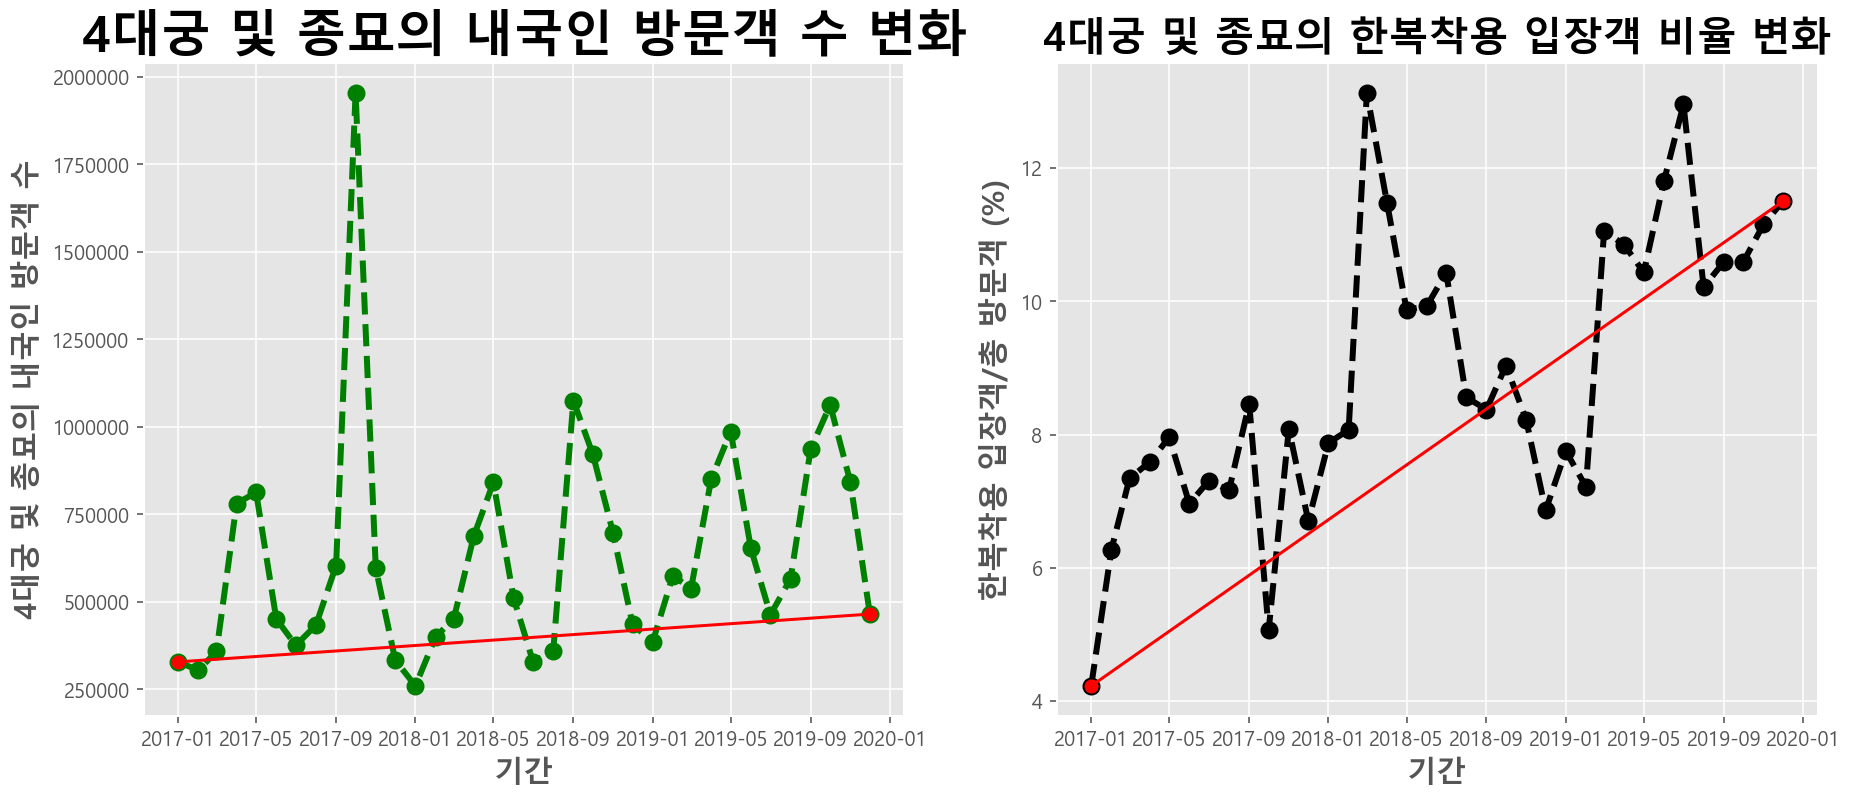

In [16]:
indexed_kor_visit=kor_total.set_index('기간')
ktv=indexed_kor_visit['내국인 총합']
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(ktv,'go--',linewidth=3,markersize=8)
plt.plot([indexed_kor_visit.index[0],indexed_kor_visit.index[35]],[ktv[0],ktv[35]],'ro-')

plt.subplot(122)
plt.plot(ratio,'ko--',linewidth=3,markersize=8)
plt.plot([indexed_kc_per_visit.index[0],indexed_kc_per_visit.index[35]],[ratio[0],ratio[35]],'ro-')

plt.subplot(121)
plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('4대궁 및 종묘의 내국인 방문객 수',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 내국인 방문객 수 변화',fontdict= { 'weight': 'bold','size':'25'})

plt.subplot(122)
plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 한복착용 입장객 비율 변화', fontdict= { 'weight': 'bold','size':'20'} )

plt.show()

## 시각화를 통한 데이터 확인-내국인 방문객 수와 한복 착용 입장객 비율 변화의 상관계수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can b

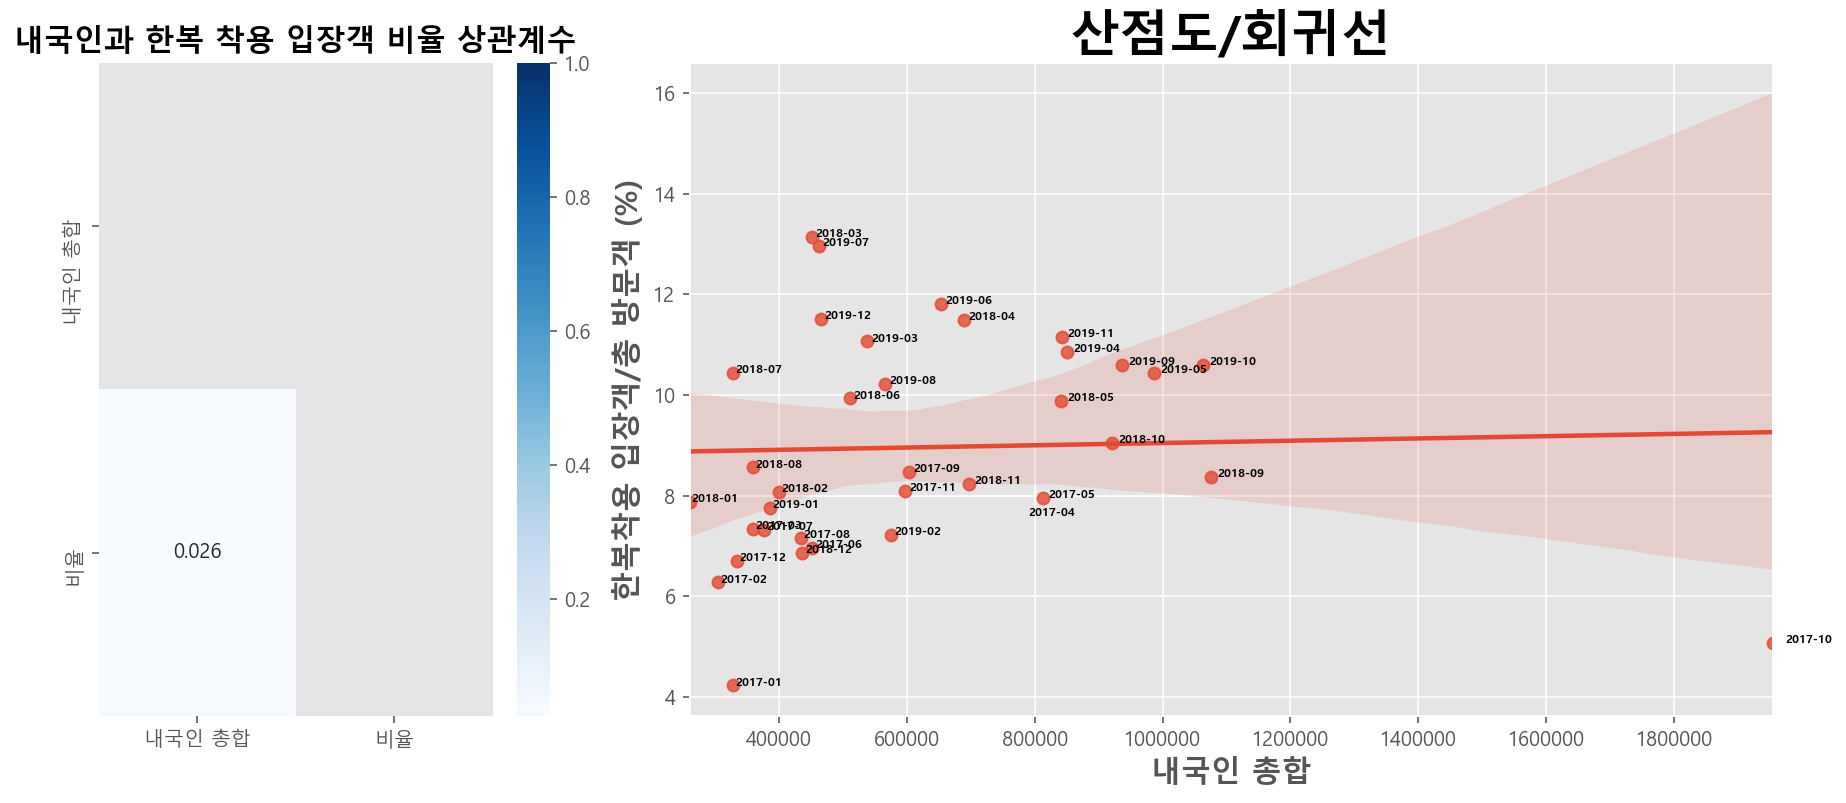

In [17]:
plt.figure(figsize=(15,6))

kor_total['비율']=kc_per_visit['비율']
kor_total['기간']=kor_total['기간'].astype(str)
for i in range(len(kor_total['기간'])):
    kor_total['기간'][i]=kor_total['기간'][i][:7]

sel_kor_total=kor_total[['내국인 총합','비율']]
corr=sel_kor_total.corr()
mask=np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplot(131)
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

plt.subplot(1,3,(2,3))
sns.regplot(data=kor_total.sample(35), x="내국인 총합", y="비율")

plt.subplot(131)
plt.title('내국인과 한복 착용 입장객 비율 상관계수',fontdict= { 'weight': 'bold','size':'15'})

plt.subplot(1,3,(2,3))
plt.xlabel('내국인 총합',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('산점도/회귀선',fontdict= { 'weight': 'bold','size':'25'})

for name in kor_total.index:
    plt.text(kor_total['내국인 총합'][name]*1.01, kor_total['비율'][name]*1.0, kor_total['기간'][name], fontsize=6, weight='bold')
    
plt.show()

## 데이터 불러오기-외국인 방문객

In [18]:
for_data=data[['기간','경복궁 외국인','창덕궁 외국인','창경궁 외국인','덕수궁 외국인','종묘 외국인']]
for_data

,기간,경복궁 외국인,창덕궁 외국인,창경궁 외국인,덕수궁 외국인,종묘 외국인
1,2017.01,"151,625","38,179","2,934","19,392","3,675"
2,2017.02,"139,457","27,363","2,111","23,012","3,104"
3,2017.03,"100,061","37,970","3,935","31,189","5,818"
4,2017.04,"124,811","48,050","11,088","36,466","5,998"
5,2017.05,"83,321","33,890","3,568","24,640","6,523"
6,2017.06,"81,119","27,162","3,348","21,038","4,557"
7,2017.07,"69,373","28,603","3,877","22,107","4,441"
8,2017.08,"61,121","29,942","4,942","22,505","4,615"
9,2017.09,"68,142","36,557","4,513","23,578","5,338"
10,2017.10,"151,735","69,877","15,164","47,478","6,850"


## 전처리

In [19]:
for_data = for_data.apply(lambda x: x.str.replace(',', ''))
for_data['기간'] = pd.to_datetime(kor_data['기간'])
for_data['경복궁 외국인'] = pd.to_numeric(for_data['경복궁 외국인'])
for_data['창덕궁 외국인'] = pd.to_numeric(for_data['창덕궁 외국인'])
for_data['창경궁 외국인'] = pd.to_numeric(for_data['창경궁 외국인'])
for_data['덕수궁 외국인'] = pd.to_numeric(for_data['덕수궁 외국인'])
for_data['종묘 외국인'] = pd.to_numeric(for_data['종묘 외국인'])
for_data['외국인 총합'] = for_data.sum(axis=1)

## 필요한 데이터만 추출

In [20]:
for_total=for_data[['기간','외국인 총합']].copy()
for_total = for_total.reset_index()
for_total

,index,기간,외국인 총합
0,1,2017-01-01,215805
1,2,2017-02-01,195047
2,3,2017-03-01,178973
3,4,2017-04-01,226413
4,5,2017-05-01,151942
5,6,2017-06-01,137224
6,7,2017-07-01,128401
7,8,2017-08-01,123125
8,9,2017-09-01,138128
9,10,2017-10-01,291104


## 시각화를 통한 데이터 확인-외국인 방문객 수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


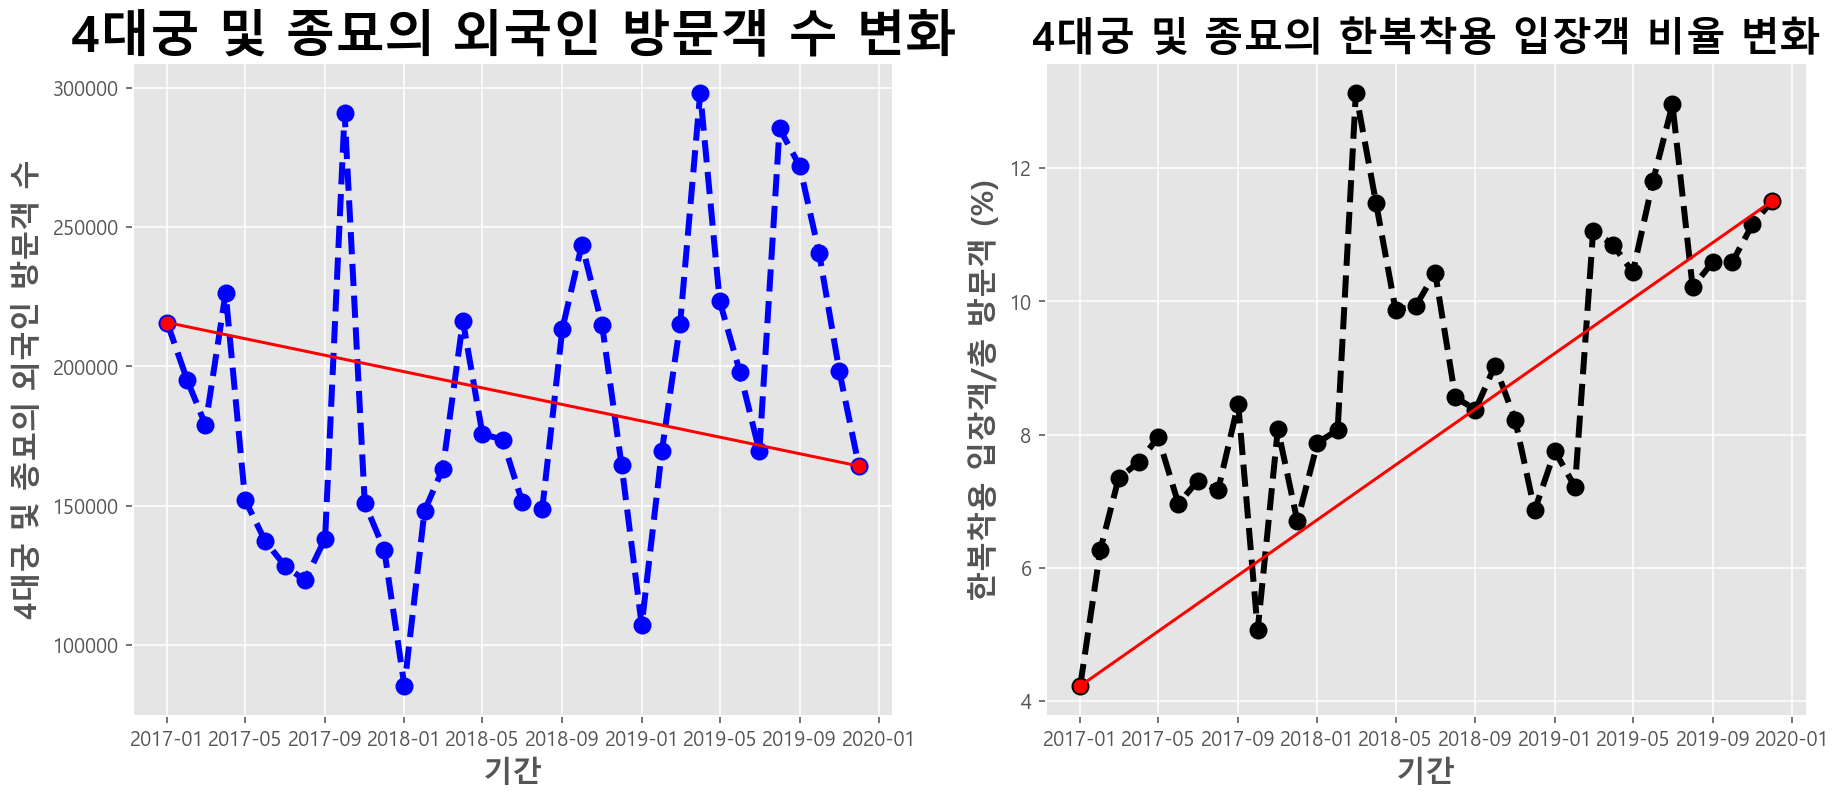

In [21]:
indexed_for_visit=for_total.set_index('기간')
ftv=indexed_for_visit['외국인 총합']
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(ftv,'bo--',linewidth=3,markersize=8)
plt.plot([indexed_for_visit.index[0],indexed_for_visit.index[35]],[ftv[0],ftv[35]],'ro-')

plt.subplot(122)
plt.plot(ratio,'ko--',linewidth=3,markersize=8)
plt.plot([indexed_kc_per_visit.index[0],indexed_kc_per_visit.index[35]],[ratio[0],ratio[35]],'ro-')

plt.subplot(121)
plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('4대궁 및 종묘의 외국인 방문객 수',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 외국인 방문객 수 변화',fontdict= { 'weight': 'bold','size':'25'})

plt.subplot(122)
plt.xlabel('기간',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('4대궁 및 종묘의 한복착용 입장객 비율 변화', fontdict= { 'weight': 'bold','size':'20'} )

plt.show()

## 시각화를 통한 데이터 확인-외국인 방문객 수와 한복 착용 입장객 비율 변화의 상관계수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can b

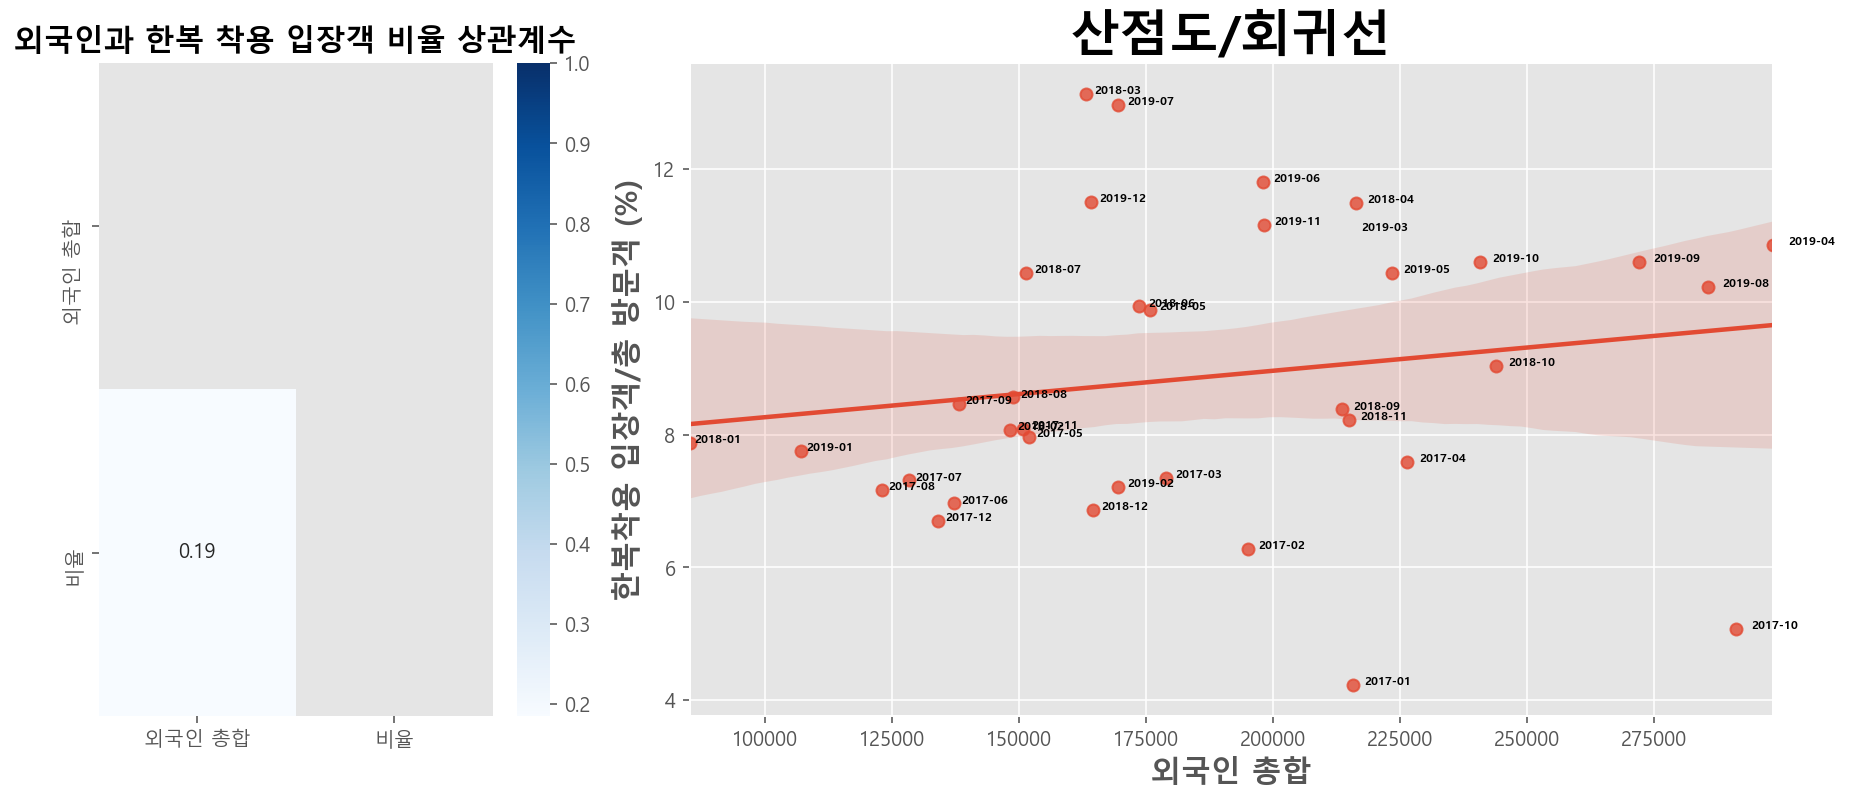

In [22]:
plt.figure(figsize=(15,6))

for_total['비율']=kc_per_visit['비율']
for_total['기간']=for_total['기간'].astype(str)
for i in range(len(for_total['기간'])):
    for_total['기간'][i]=for_total['기간'][i][:7]

sel_for_total=for_total[['외국인 총합','비율']]
corr=sel_for_total.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplot(131)
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

plt.subplot(1,3,(2,3))
sns.regplot(data=for_total.sample(35), x="외국인 총합", y="비율")

plt.subplot(131)
plt.title('외국인과 한복 착용 입장객 비율 상관계수',fontdict= { 'weight': 'bold','size':'15'})

plt.subplot(1,3,(2,3))
plt.xlabel('외국인 총합',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('산점도/회귀선',fontdict= { 'weight': 'bold','size':'25'})

for name in for_total.index:
    plt.text(for_total['외국인 총합'][name]*1.01, for_total['비율'][name]*1.00, for_total['기간'][name], fontsize=6, weight='bold')

plt.show()

# 데이터 분석을 통한 1차 결론
   * 내국인/외국인 방문객 수의 변화와 한복 착용 입장객 비율 변화 사이의 연관성이 없다고 판단됨.
   * 하지만 다른 값들의 분포와 비교했을 때 비정상적으로 떨어져 있는 '아웃라이어'가 관측되었기에 이것을 제외하고 분석해볼 필요성을 느낌

# 추가 분석
## 정의
   * '아웃라이어'란 데이터상의 다른 값들의 분포와 비교했을 때 비정상적으로 떨어져 있는 관측치이다.
   * 이 분석에서는 다른 데이터와는 지나치게 다른 양상을 띤 2017년 10월의 데이터를 '아웃라이어'라 하겠다.
   * 가장 멀리 떨어져 있는 데이터 발생 이유 조사 결과
       * 2017년 10월- 경복궁 수라간 시식 공감
       
## 설계
   * 정의에서 잡은 데이터를 제외하고, 다시 내국인/외국인 방문객 수의 변화와 한복 착용 입장객 비율 변화의 상관계수를 비교한다.

## 시각화를 통한 데이터 확인-아웃라이어 제거 후 내국인과 한복 착용 입장객 비율 변화의 상관계수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


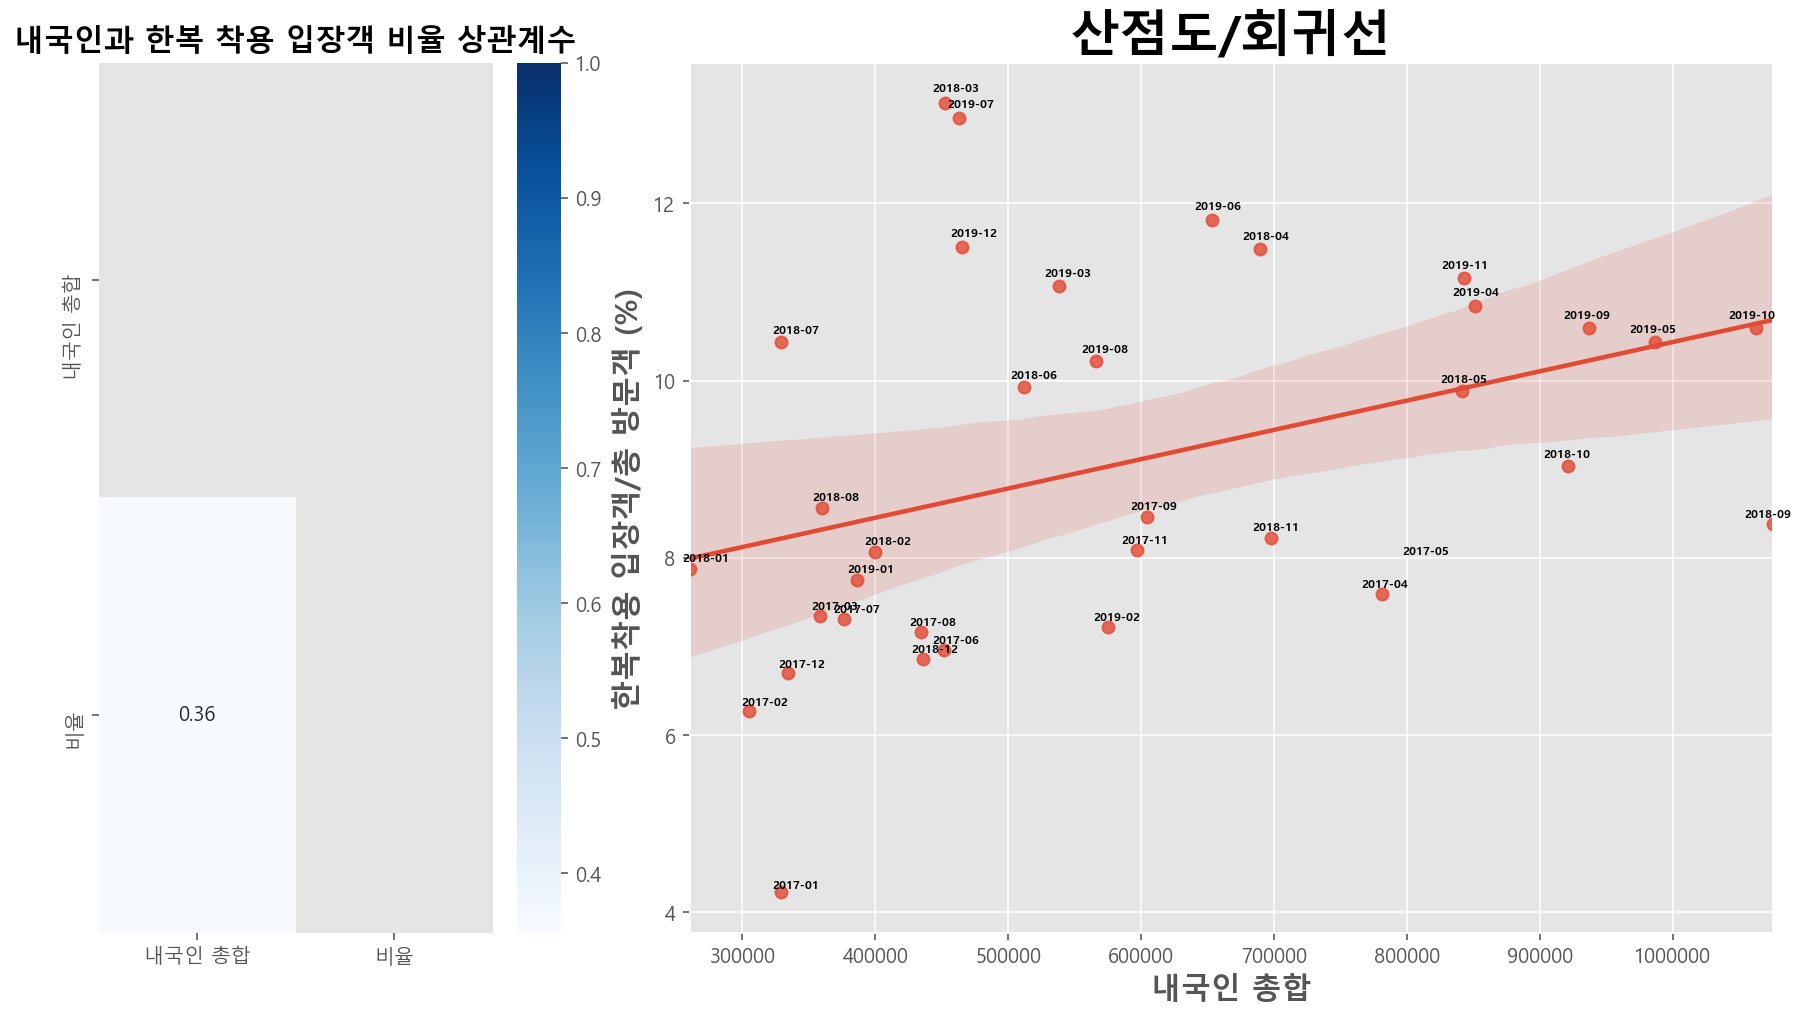

In [23]:
plt.figure(figsize=(15,8))

kor_total['비율']=kc_per_visit['비율']
kor_total['기간']=kor_total['기간'].astype(str)

# 아웃라이어 제거
kor_total=kor_total.drop(index=9,axis=1)

sel_kor_total=kor_total[['내국인 총합','비율']]
corr=sel_kor_total.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplot(131)
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

plt.subplot(1,3,(2,3))
sns.regplot(data=kor_total.sample(34), x="내국인 총합", y="비율")

plt.subplot(131)
plt.title('내국인과 한복 착용 입장객 비율 상관계수',fontdict= { 'weight': 'bold','size':'15'})

plt.subplot(1,3,(2,3))
plt.xlabel('내국인 총합',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('산점도/회귀선',fontdict= { 'weight': 'bold','size':'25'})

for name in kor_total.index:
    plt.text(kor_total['내국인 총합'][name]*0.98, kor_total['비율'][name]*1.01, kor_total['기간'][name], fontsize=6, weight='bold')
    
plt.show()

## 시각화를 통한 데이터 확인-아웃라이어 제거 후 외국인과 한복 착용 입장객 비율 변화의 상관계수

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


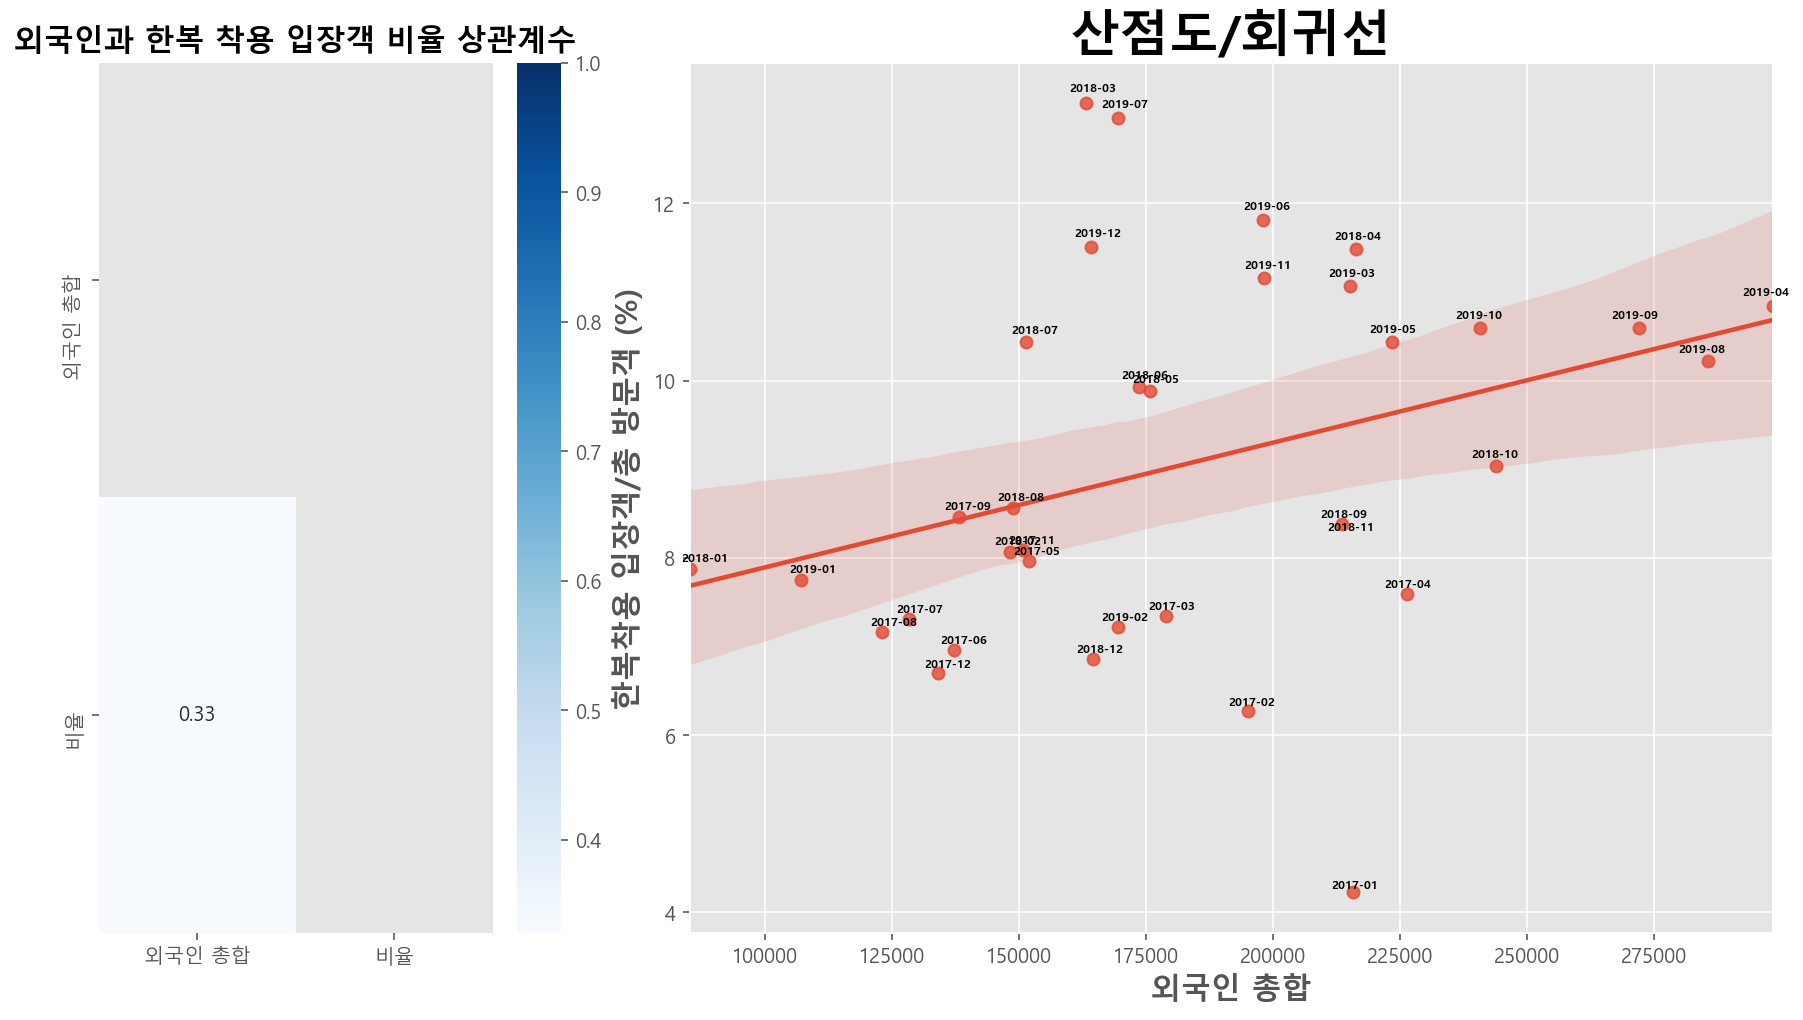

In [24]:
plt.figure(figsize=(15,8))

for_total['비율']=kc_per_visit['비율']
for_total['기간']=for_total['기간'].astype(str)

for_total=for_total.drop(index=9,axis=1)

sel_for_total=for_total[['외국인 총합','비율']]
corr=sel_for_total.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplot(131)
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

plt.subplot(1,3,(2,3))
sns.regplot(data=for_total.sample(34), x="외국인 총합", y="비율")

plt.subplot(131)
plt.title('외국인과 한복 착용 입장객 비율 상관계수',fontdict= { 'weight': 'bold','size':'15'})

plt.subplot(1,3,(2,3))
plt.xlabel('외국인 총합',fontdict= { 'weight': 'bold','size':'15'})
plt.ylabel('한복착용 입장객/총 방문객 (%)',fontdict= { 'weight': 'bold','size':'15'})
plt.title('산점도/회귀선',fontdict= { 'weight': 'bold','size':'25'})

for name in for_total.index:
    plt.text(for_total['외국인 총합'][name]*0.98, for_total['비율'][name]*1.01, for_total['기간'][name], fontsize=6, weight='bold')

plt.show()

# 추가 분석을 통한 최종 결론
   * 외국인과 한복 착용 입장객 비율 상관계수는 내국인은 0.36, 외국인은 0.33 두 군 모두 한복 착용 입장객 비율과 연관성이 있다.
   * 내국인의 한복 입장객 비율의 상관계수가 더 높기에 주 대상층은 내국인으로 잡는다.
   * 내국인을 주 대상층으로 겨냥한 이벤트를 진행하되, 외국인과의 상관계수와도 차이가 크지 않음을 고려해서, 외국인들도 쉽게 접근할 수 있는 SNS 등에 홍보하면 가게가 경쟁력을 더 얻을 수 있을 것이다.